Adding an analysis to hopefully determine the best value of trim_toa for each channel, based on a trim_toa scan from tasks.cxx

       TRIM_TOA  CALIB_2V5    0  1  2    3    4    5    6    7  ...   62  \
0             0          0    0  0  0    0    0    0    0    0  ...  0.0   
1             0          0    0  0  0    0    0    0    0    0  ...  0.0   
2             0          0    0  0  0    0    0    0    0    0  ...  0.0   
3             0          0    0  0  0    0    0    0    0    0  ...  0.0   
4             0          0    0  0  0    0    0    0    0    0  ...  0.0   
...         ...        ...  ... .. ..  ...  ...  ...  ...  ...  ...  ...   
25595         0       4080  344  0  0  216  237  170  483  467  ...  0.0   
25596         0       4080  355  0  0  220  247  172  438  473  ...  0.0   
25597         0       4080  341  0  0  218  252  169  453  469  ...  0.0   
25598         0       4080  342  0  0  205  248  166  453  482  ...  0.0   
25599         0       4080  350  0  0  212  246  171  451  478  ...  0.0   

          63   64   65     66   67   68   69   70   71  
0        0.0  0.0  0.0    0.0 

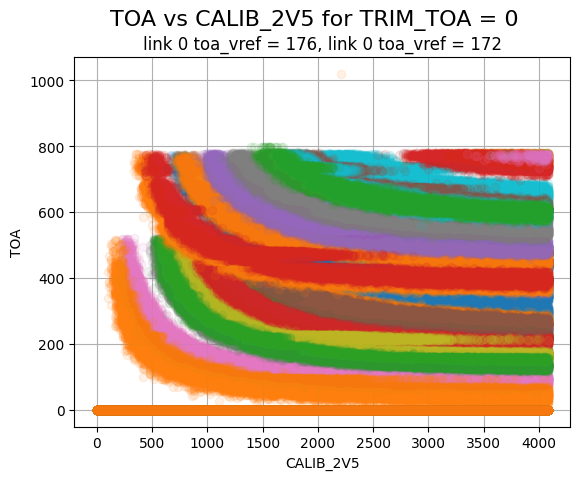

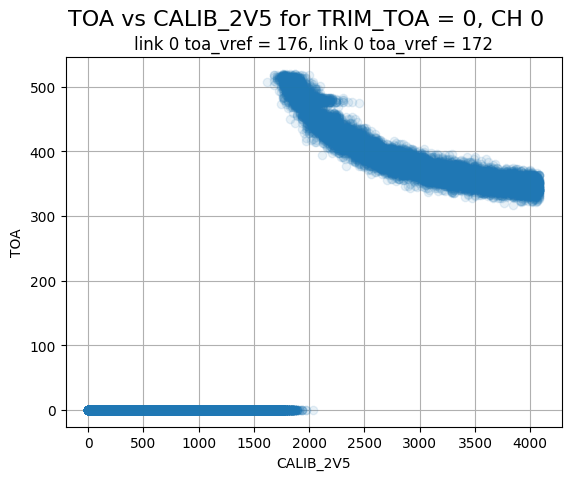

In [6]:
# Need to calculate toa_efficiency again
# First, read the file in.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('trim_toa_scan_20250716_191109.csv', 
                   skiprows=1)

# separate the data into its unique trim_toa values
unique_trim_toas = data['TRIM_TOA'].unique()
trim_lists = [] # the index equals the trim_toa value
for trim in unique_trim_toas:
    trim_lists.append(data[data['TRIM_TOA'] == trim])

# calculate the efficiency for each channel in each trim_toa
# take just trim_toa = 0 for now
trim_toa_0 = trim_lists[0]
# now want to plot toa as a function of calib, for just channel 0 now
plt.figure()
for chan in range(72):
    plt.plot(
        trim_toa_0['CALIB_2V5'],
        trim_toa_0[str(chan)],
        linestyle='none',
        marker='o',
        alpha=.1
    )
plt.xlabel('CALIB_2V5')
plt.ylabel('TOA')
plt.suptitle('TOA vs CALIB_2V5 for TRIM_TOA = 0', size=16)
plt.title('link 0 toa_vref = 176, link 0 toa_vref = 172')
plt.grid()

# now for the efficiency plot, gotta get efficiency
plt.figure()
plt.plot(
    trim_toa_0['CALIB_2V5'],
    trim_toa_0[str(0)],
    linestyle='none',
    marker='o',
    alpha=.1
)
plt.xlabel('CALIB_2V5')
plt.ylabel('TOA')
plt.suptitle('TOA vs CALIB_2V5 for TRIM_TOA = 0, CH 0', size=16)
plt.title('link 0 toa_vref = 176, link 0 toa_vref = 172')
plt.grid()

print(trim_toa_0)

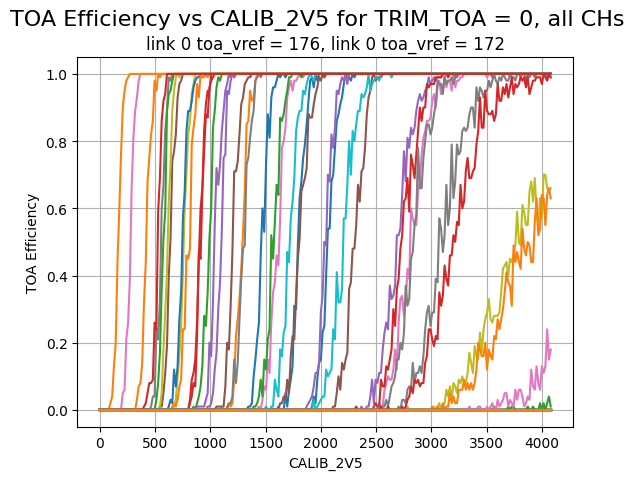

In [24]:
unique_calibs = trim_toa_0['CALIB_2V5'].unique()
toa_efficiency = []
# for chan in range(72):
for chan in range(72):
    toa_efficiency = []
    for calib in unique_calibs:
        calibs = trim_toa_0[trim_toa_0['CALIB_2V5'] == calib]
        # count the number of non-zero TOA values for this channel
        non_zeros = calibs[calibs[str(chan)] != 0]
        chan_triggers = len(non_zeros)
        chan_toa_efficiency = chan_triggers / len(calibs)
        toa_efficiency.append(chan_toa_efficiency)
    # each index in toa_efficiency corresponds to the calib/16
    x_calib = np.arange(0, len(toa_efficiency)) * 16
    plt.plot(x_calib, toa_efficiency)
plt.xlabel('CALIB_2V5')
plt.ylabel('TOA Efficiency')
plt.suptitle('TOA Efficiency vs CALIB_2V5 for TRIM_TOA = 0, all CHs', size=16)
plt.title('link 0 toa_vref = 176, link 0 toa_vref = 172')
plt.grid()

In [23]:
print(unique_calibs)
print(non_zeros)
print(len(trim_toa_0))
print(len(calibs))

[   0   16   32   48   64   80   96  112  128  144  160  176  192  208
  224  240  256  272  288  304  320  336  352  368  384  400  416  432
  448  464  480  496  512  528  544  560  576  592  608  624  640  656
  672  688  704  720  736  752  768  784  800  816  832  848  864  880
  896  912  928  944  960  976  992 1008 1024 1040 1056 1072 1088 1104
 1120 1136 1152 1168 1184 1200 1216 1232 1248 1264 1280 1296 1312 1328
 1344 1360 1376 1392 1408 1424 1440 1456 1472 1488 1504 1520 1536 1552
 1568 1584 1600 1616 1632 1648 1664 1680 1696 1712 1728 1744 1760 1776
 1792 1808 1824 1840 1856 1872 1888 1904 1920 1936 1952 1968 1984 2000
 2016 2032 2048 2064 2080 2096 2112 2128 2144 2160 2176 2192 2208 2224
 2240 2256 2272 2288 2304 2320 2336 2352 2368 2384 2400 2416 2432 2448
 2464 2480 2496 2512 2528 2544 2560 2576 2592 2608 2624 2640 2656 2672
 2688 2704 2720 2736 2752 2768 2784 2800 2816 2832 2848 2864 2880 2896
 2912 2928 2944 2960 2976 2992 3008 3024 3040 3056 3072 3088 3104 3120
 3136 